# **Studying the Black-Scholes-Merton (BSM) Model**

This notebook is primarily a set of notes that I used to study the Black-Scholes-Merton model and attempt a very basic python implementation of this model.
Here, I learn what the BSM model is, what underlying assumptions it relies on, and where it is used.
***

## (1) Studying the BSM Model

### History and Principles
The BSM model was developed in 1973 by 3 people : Fischer Black, Robert Merton and Myron Scholes.

The model uses 6 variables to calculate model financial markets:
- Volatility
- Price of the underlying asset
- Strike price of the option
- Time until the expiration of the option
- Risk-free interest rate, and the type of option
- Whether it's a call or put
 
Using these, Black, Merton and Scholes modelled heavily traded assets as following a Geometric Brownian Motion (or a Wiener process).
This is a stochastic process in continuous time, called Brownian motion due to its historical relation to the physical process as observed in smoke particulates in air.

We will now briefly explore Wiener Processes.

#### Wiener Processes
A Wiener process can be thought of and constructed as the scaling limit of a 1 dimensional random walk.
In easier terms, a Wiener process is the expected behaviour of a random walk along a number line, as the distance between each step reduces.

An example of a 1D random walk could be a walk over the integers ℤ, where we start a pointer at 0, and each "turn", there is an equal probability $p$ of going $x$ to the right or left.

Since the Wiener process is the scaling limit of the 1D random walk, a random walk with small enough steps can be used to approximate the process.

Namely, if the step size is $\epsilon$ then, walking a length of $\dfrac{L}{\epsilon^2}$ is adequate to approximate a Wiener process of length $L$.

As $\epsilon$ tends to 0 and the number of steps increase, the random walk converges to a Wiener Process.

We can model a random walk in Python

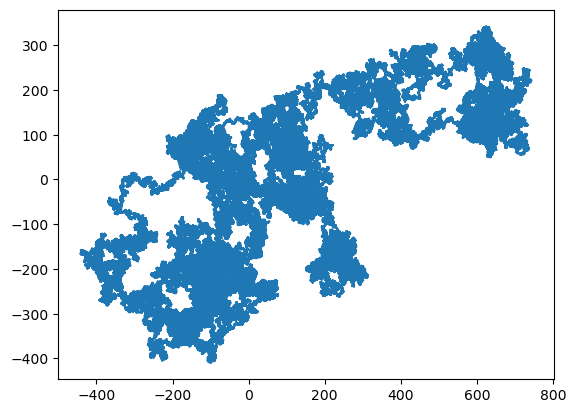

In [2]:
# Model of 2D Random Walks

# imports
import matplotlib.pyplot as plt
from random import randint as r

# We define a function steps to increase/decrease the (x,y) values by certain increments each "turn"
# Takes inputs n - number of steps, e - increment value
def step(n=1000000, e=1):

    # We start at origin (0,0), so create arrays for x and y values, starting with (0,0)
    x_val = [0]
    y_val = [0]

    # Start for loop to fill in the coordinate values for n steps.
    for i in range(n):

        # Filling the values based on a random value r:
        random = r(1,4)

        # There's an equal probability of all 4 different possible cases occurring.
        if random == 1:
            x_val.append(x_val[i]+e)
            y_val.append(y_val[i])
            
        elif random == 2:
            x_val.append(x_val[i])
            y_val.append(y_val[i]+e)

        
        elif random == 3:
            x_val.append(x_val[i]-e)
            y_val.append(y_val[i])
            
        else:
            x_val.append(x_val[i])
            y_val.append(y_val[i]-e)

    return x_val,y_val

# Mainline code
x,y = step()
plt.plot(x,y) 
plt.show()

In this implementation, the probability of any movement $e$ up, down, left or right in the 2D plane is given by a probability function such that:
$$
P(X=x) = \dfrac{1}{4} : x\in\{\text{1, 2, 3, 4}\}
$$
Where:
$$ x=\left\{
\begin{array}{ll}
      1 & \text{Add e to x value} \\
      2 & \text{Add e to y value} \\
      3 & \text{Subtract e from x value} \\
      4 & \text{Subtract e from y value} \\
\end{array} 
\right.
$$

This can be used to model a Wiener process.

First, we formulate the key properties of a Wiener process:
- $W_0=0$ almost surely
- $W$ has independent increments; for every t>0, the future increments $W_{t+u}-W_t$ , $u\geq 0$, are independent of the past values $W_s$, $s<t$.
- $W$ has Gaussian increments; $W_{t+u}-W_t$ is normally distributed with mean $0$ and variance $u$, $W_{t+u}-W_t \sim N(0,u)$
- $W$ has almost surely continuous paths; $W_t$ is almost surely continuous in $t$.

Now, the idea of a Wiener process being the continuum limit of a random walk will make more sense.

Let $\xi_1,\xi_2,...$ be a sequence independent, identically distributed random variables with mean 0 and variance 1.
For each $n \geq 1$, we can define a random walk by:
$$
S_n(t) = \sum_{1\leq i \leq \lfloor nt \rfloor}\xi_i
$$
We can then write the rescaled random walk as:
$$
W_n(t) = \dfrac{1}{\sqrt{n}}S_n(t) =\dfrac{1}{\sqrt{n}}\sum_{1\leq i \leq \lfloor nt \rfloor}\xi_i
$$
In accordance with Donsker's Theorem, this is a random step function, a sequence of which define a scaled and centred random walk.

We can set $W_0$ to be $0$, fulfilling the first property of a Wiener process.

Since each $\xi$ is independent, each increment is independent.

It is not difficult to see that as $n \rightarrow \infty$, $W_n(t)-W_n(s) \rightarrow N(0,t-s)$ by the central limit theorem, thus Gaussian increments are observed.

As $n \rightarrow \infty$, $\dfrac{1}{\sqrt{n}} \rightarrow 0$, so each step will become so small, the function is essentially continuous.

Thus, a random walk can be used to approximate a Wiener process.

***

### Deriving the BSM Equation


In order to derive the BSM equation, we need 1 key assumption, that is that the dervative is being traded on a **frictionless market**, which refers to a financial market without transaction costs. This gives us "perfect information", in which we essentially have a complete knowledge of market prices, our own utility and our cost functions.

Thus, the price of a stock follows Geometric Brownian Motion:
$$
\text{d}S = \mu S \text{ d}t + \sigma S \text{ d}W
$$
Where $S$ is the stock price as a function of $t$, $t$ is time, $\sigma$ is volatility and $W$ is the stochastic variable under brownian motion. Since d$W$ is the infinitesimal increment, it's equivalent to a Gaussian increment as observed under the Weiner Process.

The equation above also essentially states that the infinitesimal rate of return of the stock has an expected value of $\mu \text{ d}t$ and variance of $\sigma^2 \text{ d}W$.

This is by Itô's lemma which states that for any equation of the form:
$$
\text{d} X_t = \mu_t\text{ d}t + \sigma_t \text{ d}B_t
$$
Where $B_t$ is a Wiener process and $\mu$ and $\sigma$ are deterministic functions of t.

We can formally write an integral solution:
$$
X_t = \int^t_0 \mu_s \text{ d}s + \int^t_0 \sigma_s \text{ d}B_t
$$
From which we can easily read off the mean and variance, as the mean each d$B_t$ is 0 and the variance is 1.